# **Navigating the Journey: An Analytical Deep Dive into the Custody and Care of Unaccompanied Children in the U.S. (Feb 2024 - Present)**

## **1. Introduction**
This report presents an in-depth analysis of unaccompanied children who are taken into custody by U.S. Customs and Border Protection (CBP) and transferred to the Department of Health and Human Services (HHS) from Feb 2024 upto August 22, 2024. The analysis aims to uncover patterns and relationships within the data through summary statistics, correlation analysis, clustering, and decision tree classification. These insights provide a better understanding of the operational dynamics of the system and the key factors influencing the processing and care of these children.

## **2. About Dataset**
The dataset includes variables such as the number of children apprehended, those in CBP custody, those transferred to HHS, and the number discharged from HHS care. This information is crucial for analyzing the flow and management of these children through the immigration system.

## **3. Summary statistics**

|          |      Children apprehended and placed in CBP custody      |      Children in CBP custody      |   Children transferred out of CBP custody   |    Children in HHS Care    | Children discharged from HHS Care |
|----------|:--------------------------------------------------------:|:--------------------------------:|:-------------------------------------------:|:--------------------------:|:--------------------------------:|
|  count   |                          139.00                          |              139.00              |                  139.00                     |           139.00           |             139.00               |
|  mean    |                          161.31                          |              310.55              |                  236.17                     |          7324.22           |             220.31               |
|  std     |                          50.17                           |               92.24              |                   66.25                     |           875.42           |              59.98               |
|  min     |                          63.00                           |              157.00              |                  123.00                     |          5743.00           |              92.00               |
|  25%     |                         123.00                           |              237.00              |                  183.50                     |          6705.00           |             177.00               |
|  50%     |                         156.00                           |              292.00              |                  228.00                     |          7418.00           |             214.00               |
|  75%     |                         188.50                           |              370.00              |                  277.50                     |          7899.00           |             249.50               |
|  max     |                         333.00                           |              531.00              |                  440.00                     |          8902.00           |             373.00               |

### **Interpretation**:
The summary statistics reveal significant variability in the daily operations concerning unaccompanied children within the U.S. custody and care system. On average, 161 children are apprehended daily, with about 310 remaining in CBP custody and 236 being transferred out. The number of children in HHS care averages around 7,324, with daily discharges typically at 220. However, the substantial standard deviations and the broad range between minimum and maximum values indicate that the system experiences considerable fluctuations in these numbers, likely driven by external factors such as policy changes or migration trends. This variability underscores the need for flexible resource allocation and planning to manage the dynamic nature of the system effectively.

## **4. Correlation Analysis**
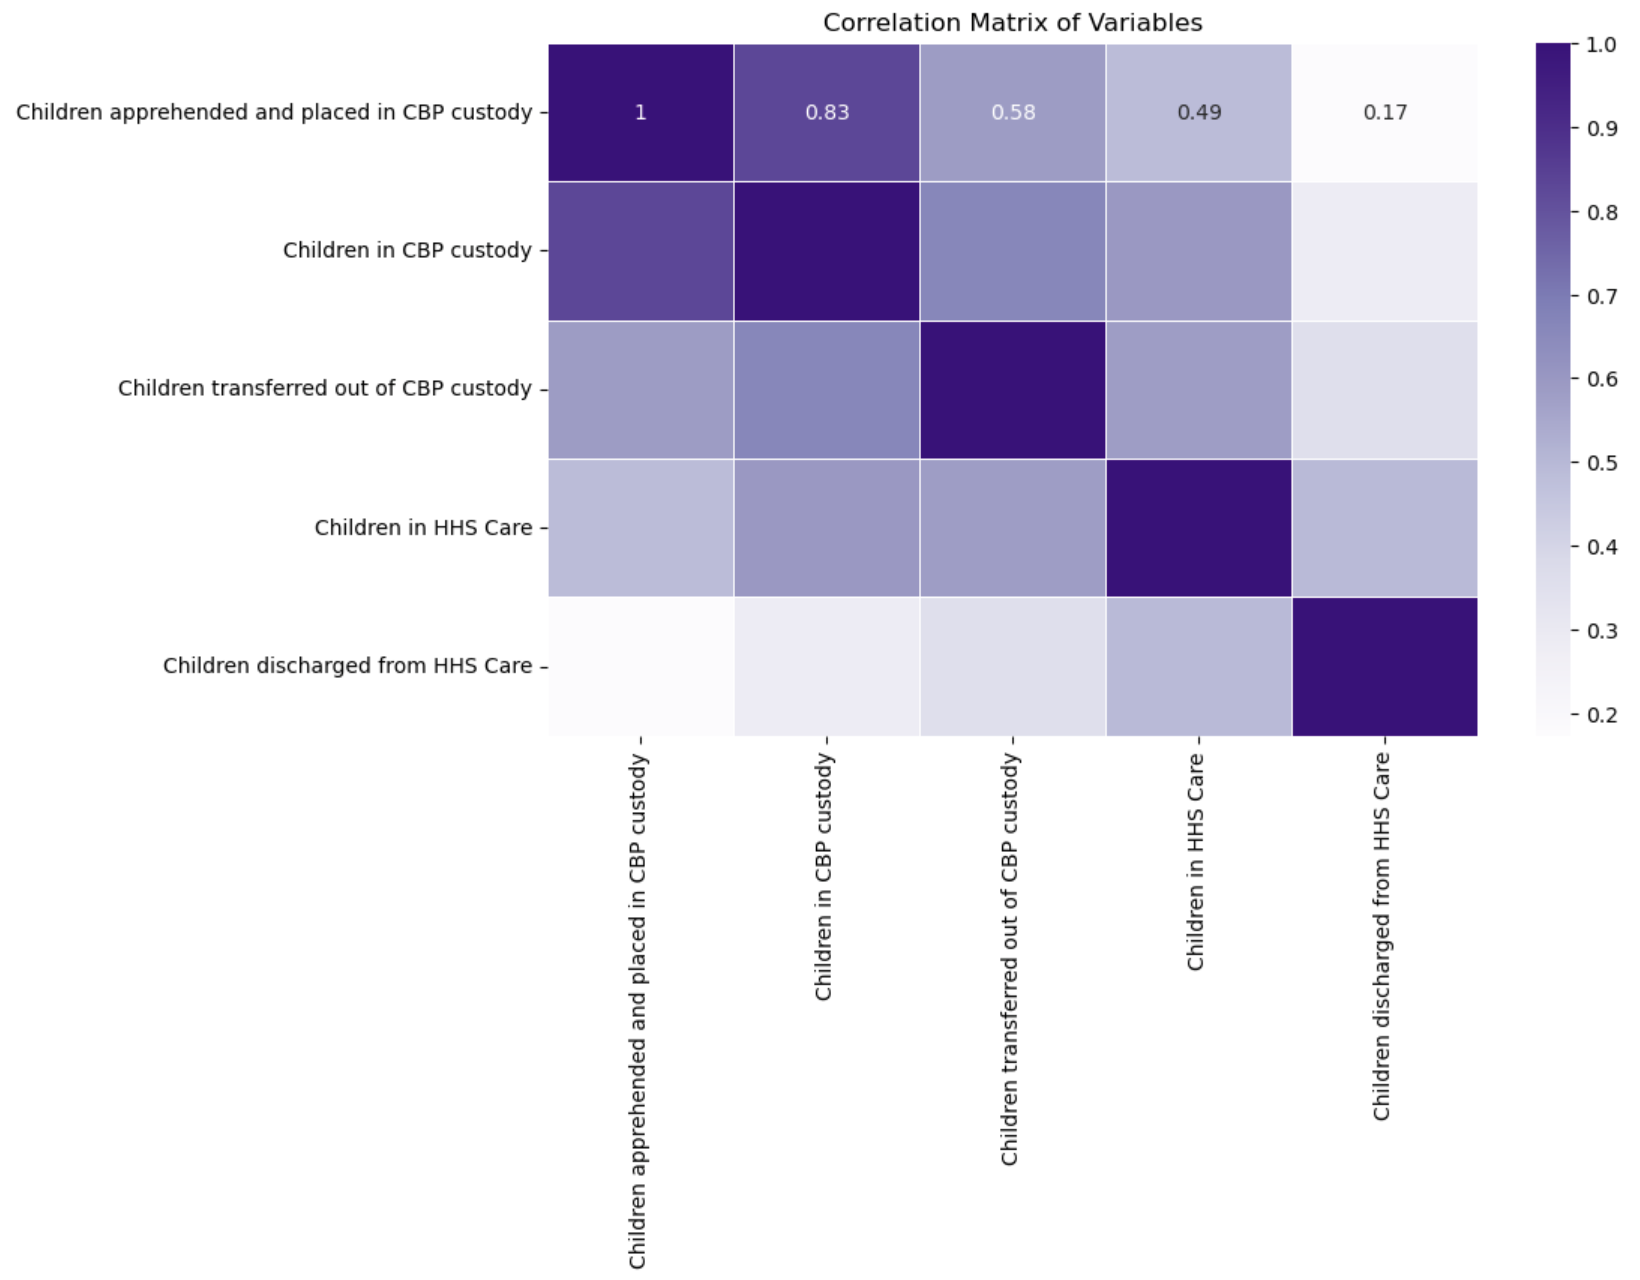

### **Interpretation**:
The matrix shows strong positive correlations between several key variables in the dataset. Specifically, there is a high correlation between "Children in CBP custody" and "Children apprehended and placed in CBP custody" (0.83), as well as between "Children in CBP custody" and "Children transferred out of CBP custody" (0.66). This indicates that higher numbers of apprehended children correlate with more children being held in custody and subsequently transferred. The lower correlations involving "Children discharged from HHS Care" suggest that discharges are less directly influenced by the initial custody processes, highlighting potential areas for efficiency improvements in the transition from custody to discharge.

## **5. Cluster Analysis of Days Based on Custody and Care Variables**

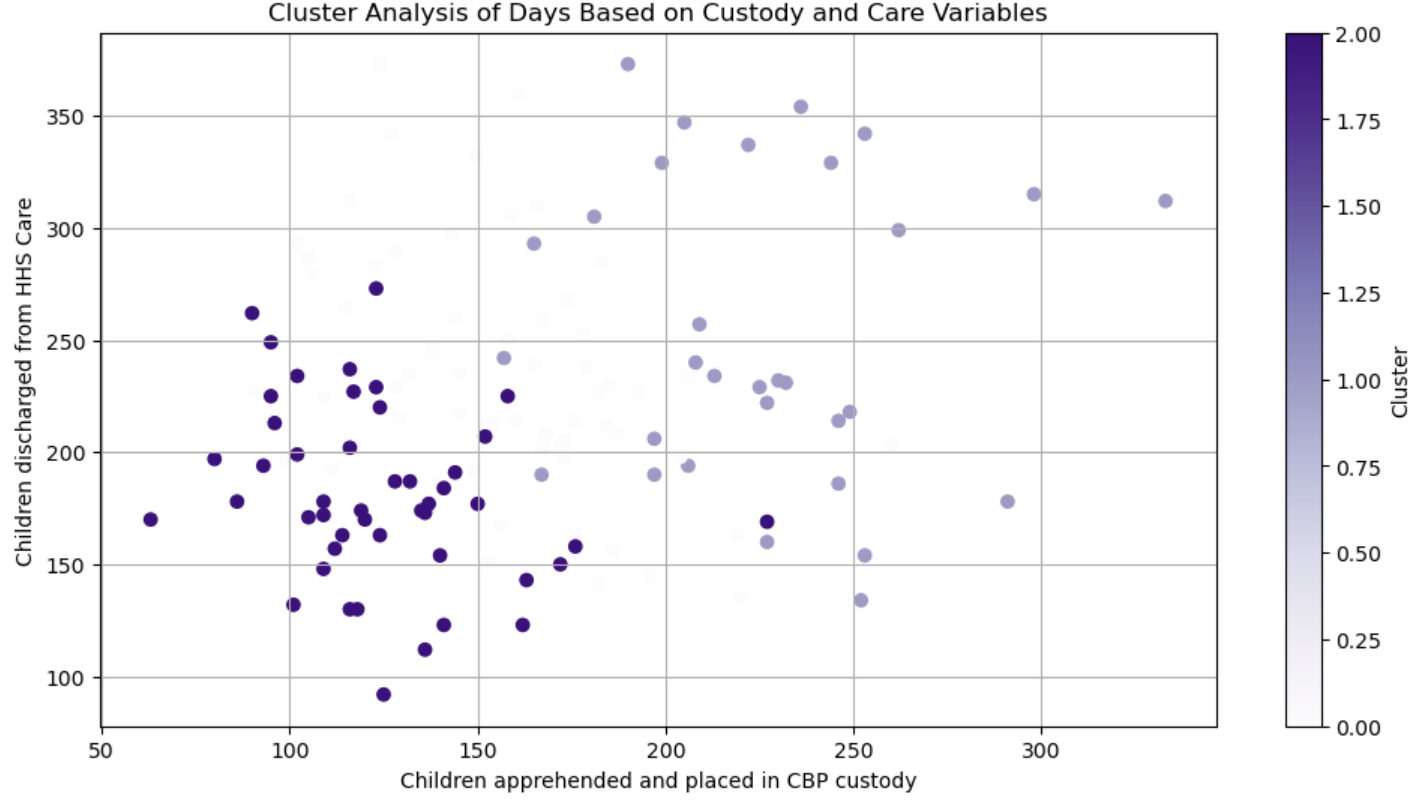

### **Interpretation**:
The cluster analysis reveals three distinct patterns in the daily operations of the U.S. system for handling unaccompanied children, indicating significant variability in how the system processes children on different days. The first cluster, representing low-activity days, suggests periods of minimal strain on the system, likely corresponding to seasonal lulls or lower migration flows, where resources can be managed with greater efficiency. The second cluster, reflecting moderate activity, captures the system's typical operational state, where the flow of children through custody, transfer, and discharge stages is steady and aligns with average daily values—implying a well-functioning system under standard conditions. The third cluster, however, highlights high-activity days characterized by surges in the number of children processed, which may be driven by external factors such as policy changes or migration spikes. These days test the system's capacity and reveal potential stress points where bottlenecks or resource shortages could occur. This clustering not only underscores the need for flexible resource management and capacity planning but also emphasizes the importance of preparedness for high-demand periods to ensure the system can maintain efficiency and care quality under varying conditions.

## **6. Decision Tree Clasifier**

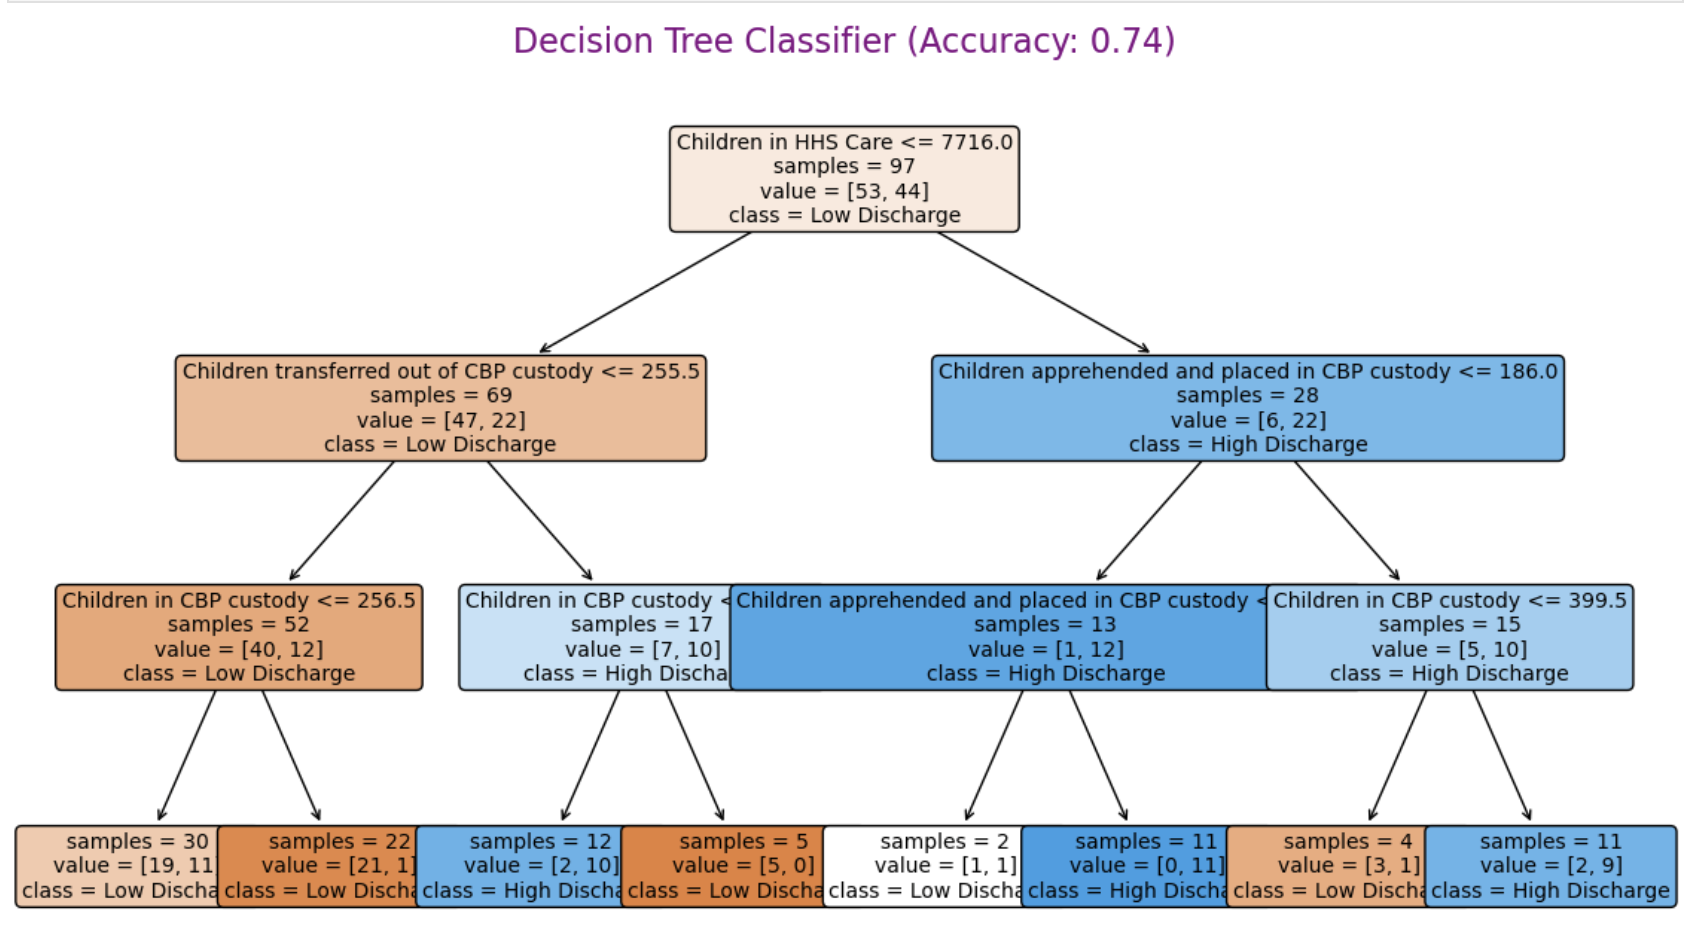

### **Interpretation**:
The root node splits on the number of children in HHS care, indicating this variable's strong influence on discharge outcomes. If the number of children in HHS care is relatively low (≤ 7,716), the model predominantly predicts a low discharge rate. This suggests that when HHS facilities are not heavily burdened, the system tends to maintain a steady, lower rate of discharges. Conversely, higher numbers in CBP custody or more children being apprehended tend to predict higher discharge rates, reflecting that when the system is under stress due to increased numbers in custody or apprehensions, it responds by accelerating the discharge process to manage capacity. The accuracy of the model is 74%, which indicates that while the model is reasonably good at predicting discharge rates, there may still be other unaccounted factors influencing these outcomes. 

## **6. Conclusion**
The analysis of the dataset related to unaccompanied children in U.S. custody has provided valuable insights into the factors influencing the system's operations, particularly the processes of apprehension, custody, transfer, and discharge. The decision tree classifier highlighted the critical thresholds in variables such as the number of children in HHS care and CBP custody, which significantly impact the likelihood of higher discharge rates. The model's reasonable accuracy, combined with the identification of key decision points, suggests that operational pressures, such as increases in CBP custody or apprehensions, prompt the system to adjust by increasing discharge rates to manage capacity.

Further, the cluster analysis revealed distinct patterns in daily operations, emphasizing the variability in the system's response to different levels of demand. The advanced machine learning and statistical techniques proposed, such as Random Forests, Gradient Boosting, and Survival Analysis, offer avenues for improving predictive accuracy and gaining deeper insights into the dynamic interactions between variables. These methods could enhance decision-making by enabling more precise forecasts, better resource allocation, and a clearer understanding of the factors driving operational outcomes.

Overall, this analysis underscores the importance of a flexible and responsive system that can adapt to varying demands while maintaining the quality of care for unaccompanied children. By applying these advanced techniques, stakeholders can optimize operations, anticipate challenges, and ensure that the system remains resilient under different conditions. 

## **Python Code**

### **Summary statistics**

In [ ]:
import pandas as pd

file_path = '/Users/nahoemip/Downloads/HHS Unaccompanied.xlsx'
df = pd.read_excel(file_path)

summary_statistics = df.describe().round(2)

summary_statistics = summary_statistics.drop(columns=['Date'], errors='ignore')

print("Summary Statistics of Unaccompanied Children Data:")
print(summary_statistics.to_string())

### **Correlation Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/nahoemip/Downloads/HHS Unaccompanied.xlsx'
df = pd.read_excel(file_path)

df_numeric = df.drop(columns=['Date'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()

### **Cluster Analysis**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = df[['Children apprehended and placed in CBP custody',
               'Children in CBP custody',
               'Children transferred out of CBP custody',
               'Children in HHS Care',
               'Children discharged from HHS Care']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(12, 6))
plt.scatter(df['Children apprehended and placed in CBP custody'], df['Children discharged from HHS Care'], c=df['Cluster'], cmap='Purples', marker='o')
plt.title('Cluster Analysis of Days Based on Custody and Care Variables')
plt.xlabel('Children apprehended and placed in CBP custody')
plt.ylabel('Children discharged from HHS Care')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

### **Decision Tree Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = '/Users/nahoemip/Downloads/HHS Unaccompanied.xlsx'
df = pd.read_excel(file_path)

median_value = df['Children discharged from HHS Care'].median()
df['High_Discharge'] = (df['Children discharged from HHS Care'] > median_value).astype(int)

X = df[['Children apprehended and placed in CBP custody',
        'Children in CBP custody',
        'Children transferred out of CBP custody',
        'Children in HHS Care']]
y = df['High_Discharge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)  
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(14, 8))
plot_tree(dt_classifier, 
          feature_names=X.columns, 
          class_names=['Low Discharge', 'High Discharge'], 
          filled=True, 
          rounded=True, 
          impurity=False, 
          fontsize=10)

plt.title(f'Decision Tree Classifier (Accuracy: {accuracy:.2f})', fontsize=16, color='purple')
plt.show()